https://www.kaggle.com/iabhishekofficial/prediction-on-hospital-readmission

https://www.kaggle.com/brandao/diabetes

![title](1.png)

# 此案例中 我們需要預測此病患:
* 1.沒有再入院
* 2.在不到30天的時間內再入院（這種情況不好，因為可能你的治療不合適）
* 3.再入院超過30天（這個不太好，最後一個，但原因可能是病人的狀態。)

###  <<再次入院>>  標示於欄位的最後方 readmitted


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("123.csv") #讀取CSV檔
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

## 先查看目標 : <<再次入院>> 佔資料的比例有多少
## 以圖表呈現

readmitted欄位的資料型態為<class 'str'>


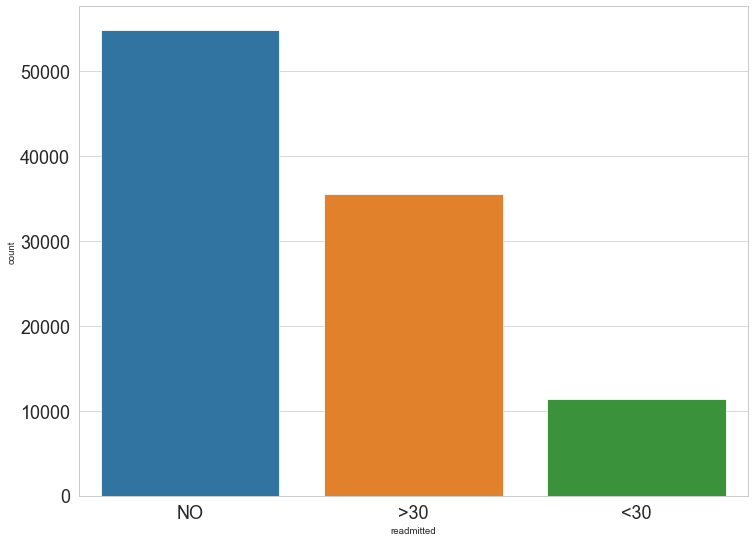

In [141]:
df['readmitted'].value_counts

name = 'readmitted'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

### 可觀察到 若將住院小於30天,住院大於30天加起來,和未繼續住院的病患人數差不多

### 將住院時間住院小於30天,住院大於30天的資料作合併為（住院）,方便我們進行預測


In [142]:
condition = df['readmitted']!='NO'
df['readmitted'] = np.where(condition,1,0)

## df['readmitted']!='NO' 可得到一個判斷的表格 若readmitted內的值不為"NO" 則為True

## np.where : 若滿足條件(condition)，輸出x，不滿足輸出y。

## 也就是說 若滿足(if) [readmitted內的值不為"NO"] 則輸出 1 , 否則(else)輸出 0

## 可參考此網站 https://blog.csdn.net/wydyttxs/article/details/80041609

## 以圖表確認有無合併

readmitted欄位的資料型態為<class 'numpy.int32'>


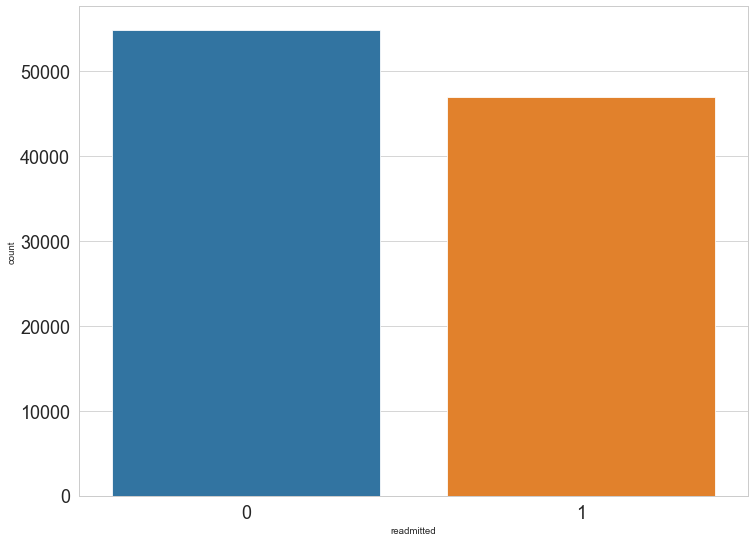

In [143]:
df['readmitted'].value_counts

name = 'readmitted'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

## 從資料的開頭觀察 某些資料標示了 (?) 的圖示 將他們以nan(未知)取代

In [144]:
df.replace('?',np.nan,inplace=True)

## 查看各欄位的na數量

In [145]:
## isnull可判斷欄位是否為空值 
## sum則是計算總和 (axis=0返回每一列的值,axis=1返回每一行的值)
df.isnull().sum(axis=0)


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 


## 以圖像觀看 各資料缺失值的百分比

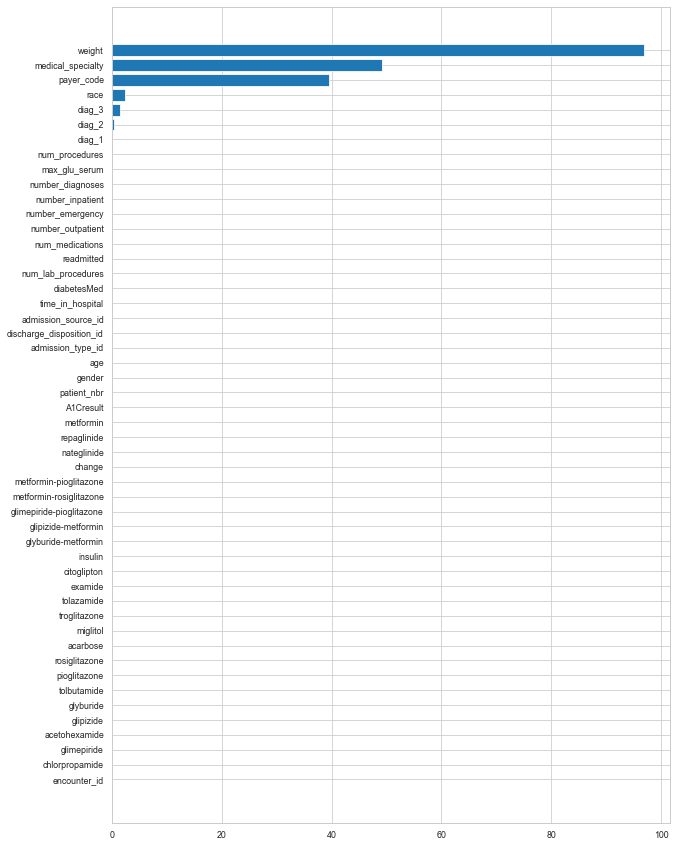

In [146]:
plt.figure(figsize=(10,15))
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

## 發現部分欄位有極多缺失值 可刪除該欄位 以免訓練失準

In [147]:
## drop函式可刪除欄位,axis=1為指定一整行
## inplace=True：不創建新的對象，直接對原始對象進行修改

## inplace=False：對數據進行修改，創建並返回新的對象承載其修改結果

df.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)
df.isnull().sum(axis=0)

encounter_id                   0
patient_nbr                    0
race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

## 沒有特殊資訊的欄位也可做刪除 減少模型訓練的負擔 像是病人id編號 病例id編號等等

In [148]:
df.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1,inplace=True)
df.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female   [0-10)                 1                  41   
1        Caucasian  Female  [10-20)                 3                  59   
2  AfricanAmerican  Female  [20-30)                 2                  11   
3        Caucasian    Male  [30-40)                 2                  44   
4        Caucasian    Male  [40-50)                 1                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  ... citoglipton insulin glyburide-metformin  \
0                 0  ...          No      No                  No   
1                 0  ...          No      Up                  No   
2                 1  ...          No      No                  No   
3                 0  ...          No      Up                  No   
4                 0  ...          No  Steady                  No   

   glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                   No                       No                      No   
1                   No                       No                      No   
2                   No                       No                      No   
3                   No                       No                      No   
4                   No                       No                      No   

  metformin-pioglitazone change diabetesMed readmitted  
0                     No     No          No          0  
1                     No     Ch         Yes          1  
2                     No     No         Yes          0  
3                     No     Ch         Yes          0  
4                     No     Ch         Yes          0  

[5 rows x 42 columns]

## 三種藥物
* citoglipton
* examide
* metformin-rosiglitazone
## 在資料中，如果有特徵都具有相同的值，且和其他特徵無關聯性，我們可將其去除


citoglipton欄位的資料型態為<class 'str'>


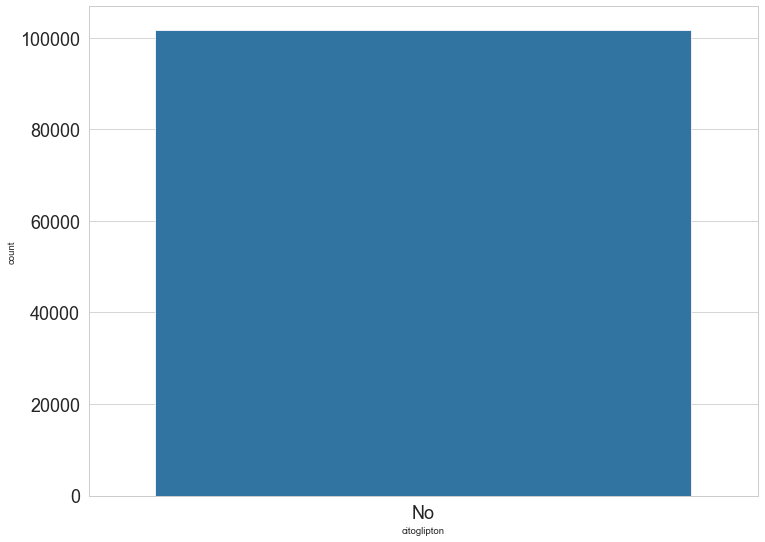

In [149]:
df['citoglipton'].value_counts

name = 'citoglipton'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

examide欄位的資料型態為<class 'str'>


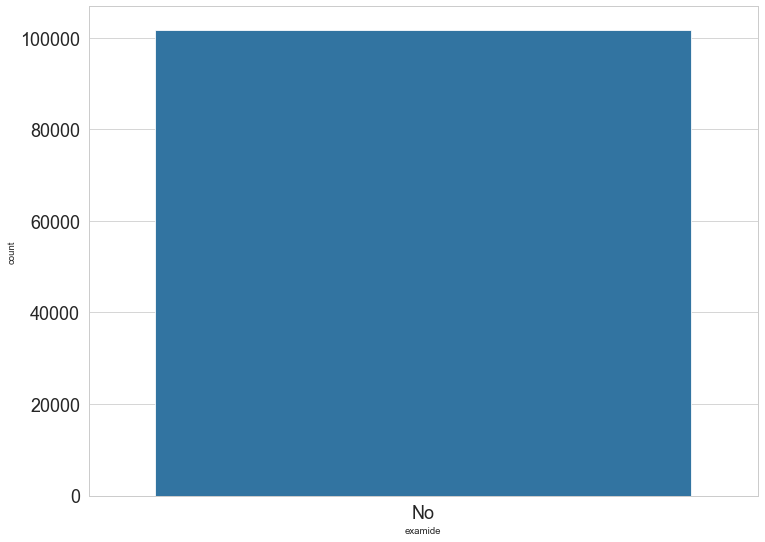

In [150]:
df['examide'].value_counts

name = 'examide'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

metformin-rosiglitazone欄位的資料型態為<class 'str'>


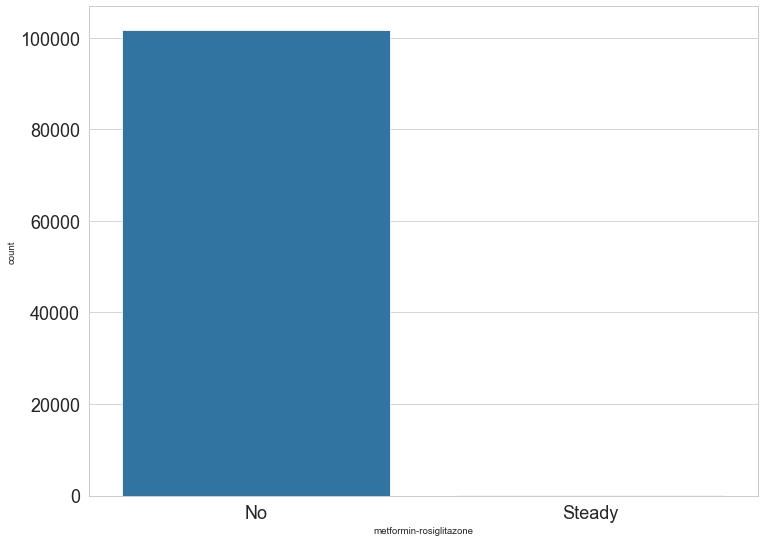

In [151]:
df['metformin-rosiglitazone'].value_counts

name = 'metformin-rosiglitazone'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

### 可將三筆資料給去除(drop)

In [152]:
df = df.drop('metformin-rosiglitazone',axis=1)
df =df.drop('citoglipton',axis=1)
df =df.drop('examide',axis=1)

## 刪除完欄位後 需再針對個別行數的缺失值 進行修正  
* race                        2273
* diag_1                        21
* diag_2                       358
* diag_3                      1423

In [153]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)

In [154]:
## 檢查是否還有缺失值
df.isnull().sum(axis=0)

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-

### 去除缺失值後 下一階段是將(文字信息)轉換為(數字型態) 才能使模型理解並訓練

### 查看各欄位包含的所有值 (counter) 才能決定用何種方式轉換

輸入欄位名稱:gender
gender欄位的資料型態為<class 'str'>


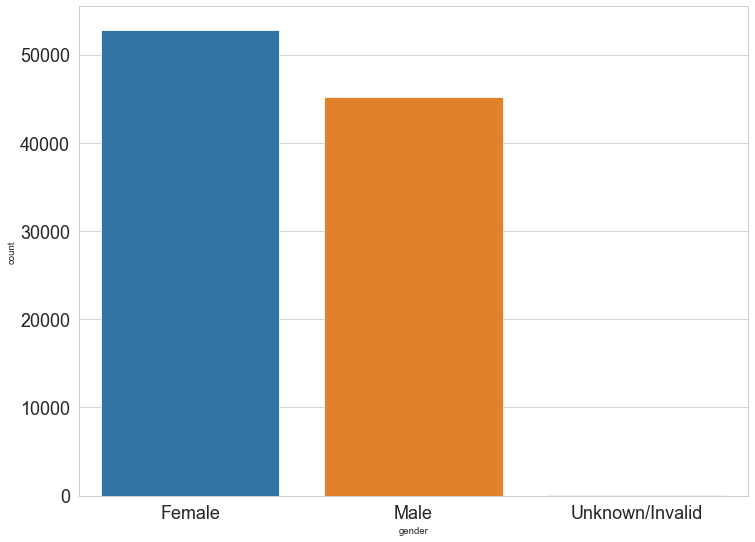

In [130]:
from collections import Counter

name = input("輸入欄位名稱:")

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

## 輸入gender 或者其他欄位名稱 觀察一下資料型態以及筆數

#### 這邊提醒一下 在查看欄位時 根據自己的經驗 發現怪異的離群值 也能用此方法刪除行數! 
#### 像是genger欄位 檢查到了一個未知性別的人 根據常理 我們可以當成怪異離群值去除

https://ithelp.ithome.com.tw/articles/10194003

In [155]:
mask = df['gender'] != 'Unknown/Invalid'
df = df[mask]


#### 去除完後輸入gender檢查

輸入欄位名稱:gender


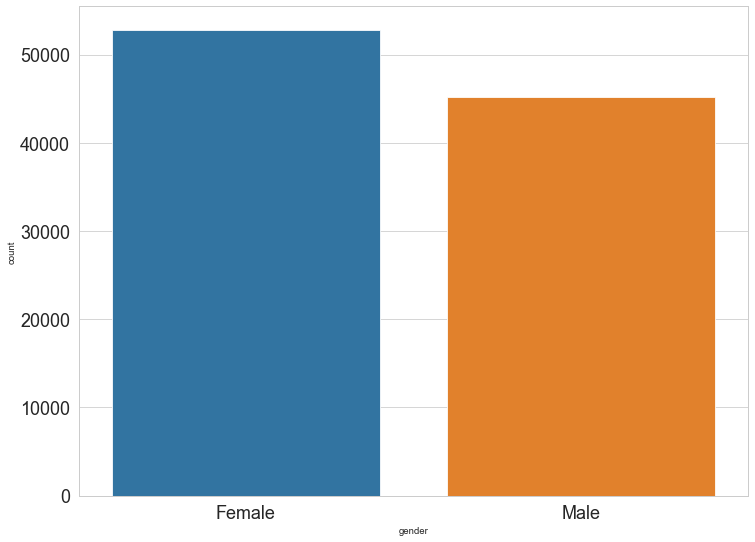

In [133]:
name = input("輸入欄位名稱:")

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list

ans = count(name)
ans[0]

# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)
## 再次輸入gender 檢查異常資料是否已去除

## 接著這裡的前處理比較複雜，卻也是最為重要的

## diag 診斷分類

## 診斷分類：數據集包含針對給定患者（主要，次要和其他）的最多三次診斷。

## 將這些診斷代碼經由整理 合併為9種疾病類別

## 包括循環系統，呼吸系統，消化系統，糖尿病，損傷，肌肉骨骼，泌尿生殖系統，腫瘤和其他

## 步驟為：
* 將diag內的文字,替換為負號
* 將diag的文字轉換為數字
* 依照編號 根據kaggle內的參考 給予資料(9種類別疾病的其中一種)

In [156]:
diag_cols = ['diag_1','diag_2','diag_3']
df[diag_cols]
for col in diag_cols:
    df[col] = df[col].str.replace('E','-') ## 將文字替換成負號
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250') ## 用來判斷每行是否包含('250') 回傳True or False 
#     print(condition)
    df.loc[condition,col] = '250'
#     print(df.loc[condition,col])

df[diag_cols] = df[diag_cols].astype(float)

In [138]:
# df[diag_cols] = df[diag_cols].astype(float)
# df[diag_cols]

In [157]:
i = 1
for col in diag_cols:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes%s'%i
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory%s'%i
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory%s'%i
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive%s'%i
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary%s'%i
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury%s'%i
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal%s'%i
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms%s'%i
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others%s'%i)
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    df.drop('temp',axis=1,inplace=True)
    i+=1

df.dropna(inplace=True)

### 以數字替換原本文字 包含了one hot encoder 以及label encoder

#### 以gender 性別 來說 男和女兩種屬性無交集 可用one hot encoder
#### 但以age 年齡來說 本身是有時間的相連性 所以使用label encoder
#### 製作方法都雷同
* 1.製作對應的數字字典
* 2.替換至原本的資料
* or使用 sklearn內建的 labelEncoder


In [158]:
gender_size_mapping = {'Female' : 1,
                       'Male' : -1}
df['gender'] = df['gender'].map(gender_size_mapping)

age_size_mapping = {'[70-80)':75,   ### 這邊採中位數 若是想以其他方式取代也可以
                   '[60-70)':65,
                    '[80-90)': 85,
                    '[50-60)': 55,
                     '[40-50)': 45,
                     '[30-40)':35,
                     '[90-100)': 95,
                     '[20-30)': 25,
                     '[10-20)': 15,
                     '[0-10)': 5}

df['age'] = df['age'].map(age_size_mapping)
df.head()

race  gender  age  time_in_hospital  num_lab_procedures  \
0        Caucasian       1   15                 3                  59   
1  AfricanAmerican       1   25                 2                  11   
2        Caucasian      -1   35                 2                  44   
3        Caucasian      -1   45                 1                  51   
4        Caucasian      -1   55                 3                  31   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0               18                  0                 0   
1               5               13                  2                 0   
2               1               16                  0                 0   
3               0                8                  0                 0   
4               6               16                  0                 0   

   number_inpatient  ... troglitazone tolazamide insulin  glyburide-metformin  \
0                 0  ...           No         No      Up                   No   
1                 1  ...           No         No      No                   No   
2                 0  ...           No         No      Up                   No   
3                 0  ...           No         No  Steady                   No   
4                 0  ...           No         No  Steady                   No   

  glipizide-metformin glimepiride-pioglitazone metformin-pioglitazone change  \
0                  No                       No                     No     Ch   
1                  No                       No                     No     No   
2                  No                       No                     No     Ch   
3                  No                       No                     No     Ch   
4                  No                       No                     No     No   

  diabetesMed readmitted  
0         Yes          1  
1         Yes          0  
2         Yes          0  
3         Yes          0  
4         Yes          1  

[5 rows x 39 columns]

#### 可觀察到gender 與 age已經被替換為數字 則其他資料做法也雷同

In [159]:
max_glu_serum_dict = {'None':1,
                      'Norm':100,
                      '>200':200,
                      '>300':300
                     }
df['max_glu_serum'] = df['max_glu_serum'].map(max_glu_serum_dict)

A1Cresult_dict = {'None':0,
                  'Norm':5,
                  '>7':7,
                  '>8':8
                 }
df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)

change_dict = {'No':-1,
               'Ch':1
              }
df['change'] = df['change'].replace(change_dict)

diabetesMed_dict = {'No':-1,
                    'Yes':1
                   }
df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)

d24_feature_dict = {'Up':10,
                    'Down':-10,
                    'Steady':5,
                    'No':-20
                   }
d24_cols = ['metformin','repaglinide','nateglinide','chlorpropamide',
 'glimepiride','acetohexamide','glipizide','glyburide',
 'tolbutamide','pioglitazone','rosiglitazone','acarbose',
 'miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin',
 'glimepiride-pioglitazone','metformin-pioglitazone']
for col in d24_cols:
    df[col] = df[col].replace(d24_feature_dict)



race_dict = {'Caucasian': 4,
 'AfricanAmerican': 8,
 'Hispanic': 12,
 'Other': 16,
 'Asian': 20}

df['race'] = df['race'].map(race_dict)



df.head()

race  gender  age  time_in_hospital  num_lab_procedures  num_procedures  \
0     4       1   15                 3                  59               0   
1     8       1   25                 2                  11               5   
2     4      -1   35                 2                  44               1   
3     4      -1   45                 1                  51               0   
4     4      -1   55                 3                  31               6   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
0               18                  0                 0                 0   
1               13                  2                 0                 1   
2               16                  0                 0                 0   
3                8                  0                 0                 0   
4               16                  0                 0                 0   

   ... troglitazone tolazamide insulin  glyburide-metformin  \
0  ...          -20        -20      10                  -20   
1  ...          -20        -20     -20                  -20   
2  ...          -20        -20      10                  -20   
3  ...          -20        -20       5                  -20   
4  ...          -20        -20       5                  -20   

   glipizide-metformin  glimepiride-pioglitazone  metformin-pioglitazone  \
0                  -20                       -20                     -20   
1                  -20                       -20                     -20   
2                  -20                       -20                     -20   
3                  -20                       -20                     -20   
4                  -20                       -20                     -20   

   change  diabetesMed  readmitted  
0       1            1           1  
1      -1            1           0  
2       1            1           0  
3       1            1           0  
4      -1            1           1  

[5 rows x 39 columns]

## 檢查一下有沒有資料還未轉換的

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 0 to 98052
Data columns (total 39 columns):
race                        98052 non-null int64
gender                      98052 non-null int64
age                         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
diag_1                      98052 non-null object
diag_2                      98052 non-null object
diag_3                      98052 non-null object
number_diagnoses            98052 non-null int64
max_glu_serum               98052 non-null int64
A1Cresult                   98052 non-null int64
metformin                   98052 non-null int64
repaglinide                 98052 non-null int64
nategl

## 可看到 diag 系列沒有被轉為數值型態 使用one hot再轉換一次

In [161]:
cat_cols = list(df.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col])], axis=1)
df.head()

race  gender  age  time_in_hospital  num_lab_procedures  num_procedures  \
0     4       1   15                 3                  59               0   
1     8       1   25                 2                  11               5   
2     4      -1   35                 2                  44               1   
3     4      -1   45                 1                  51               0   
4     4      -1   55                 3                  31               6   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
0               18                  0                 0                 0   
1               13                  2                 0                 1   
2               16                  0                 0                 0   
3                8                  0                 0                 0   
4               16                  0                 0                 0   

   ...  Respiratory2  Circulatory3  Diabetes3  Digestive3  Genitourinary3  \
0  ...             0             0          0           0               0   
1  ...             0             0          0           0               0   
2  ...             0             1          0           0               0   
3  ...             0             0          1           0               0   
4  ...             0             0          1           0               0   

   Injury3  Muscoloskeletal3  Neoplasms3  Others3  Respiratory3  
0        0                 0           0        1             0  
1        0                 0           0        1             0  
2        0                 0           0        0             0  
3        0                 0           0        0             0  
4        0                 0           0        0             0  

[5 rows x 63 columns]

In [162]:
df.info()
df.to_csv('pre_data.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 0 to 98052
Data columns (total 63 columns):
race                        98052 non-null int64
gender                      98052 non-null int64
age                         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
number_diagnoses            98052 non-null int64
max_glu_serum               98052 non-null int64
A1Cresult                   98052 non-null int64
metformin                   98052 non-null int64
repaglinide                 98052 non-null int64
nateglinide                 98052 non-null int64
chlorpropamide              98052 non-null int64
glimepiride                 98052 non-null int64
acetohexa

### 完成前處理後 可觀察各個欄位之間彼此的關聯程度 此時會用到相關係數

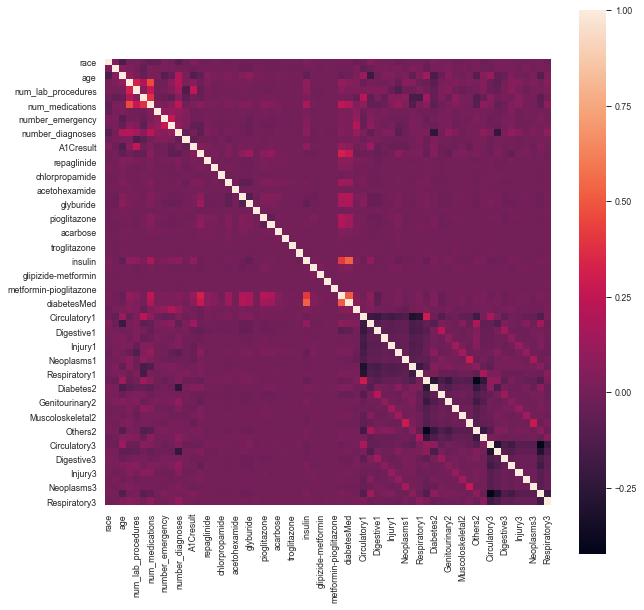

In [163]:
## 此圖是可觀察所有資料彼此的關聯程度
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,vmax=1,square=True);

## 病患再入院的時間關係：

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

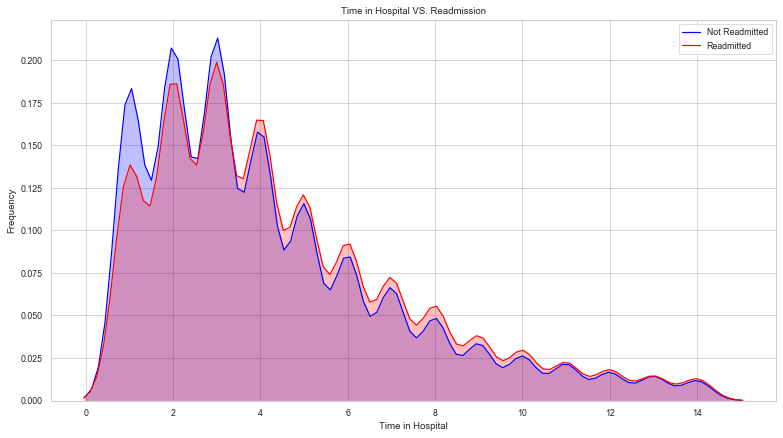

In [164]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

## 以及年齡與再入院人數關係

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

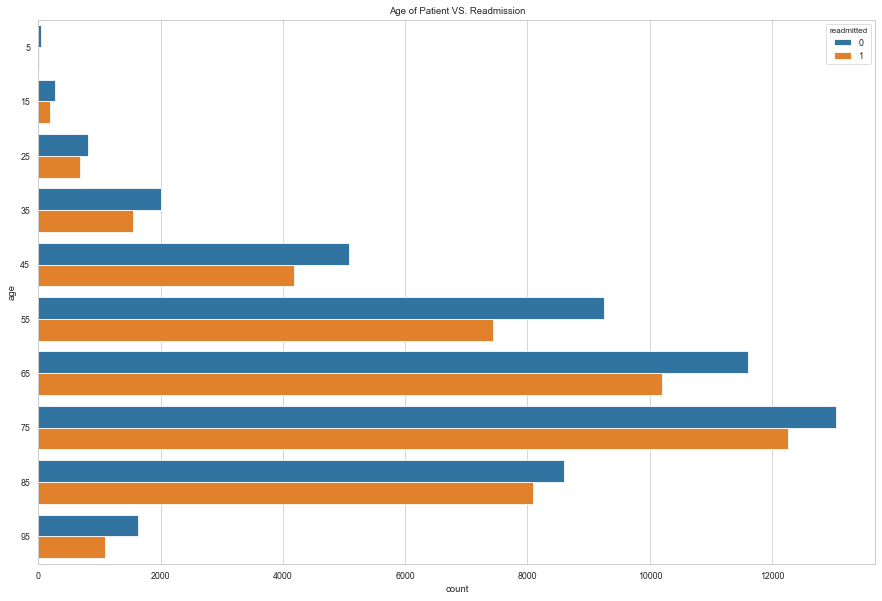

In [165]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

## 病患人種與再入院的關係

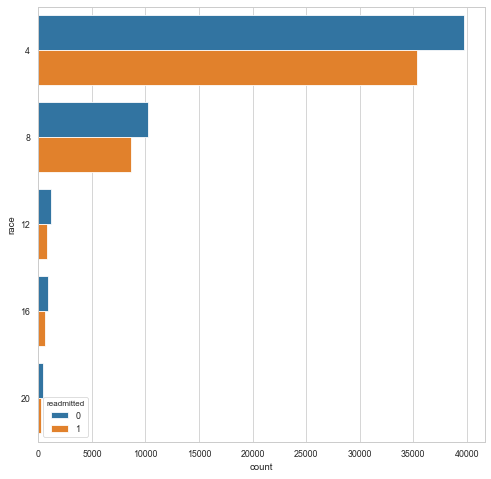

In [166]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

## 性别和再入院關係：
* 男= 1
* 女= 0

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

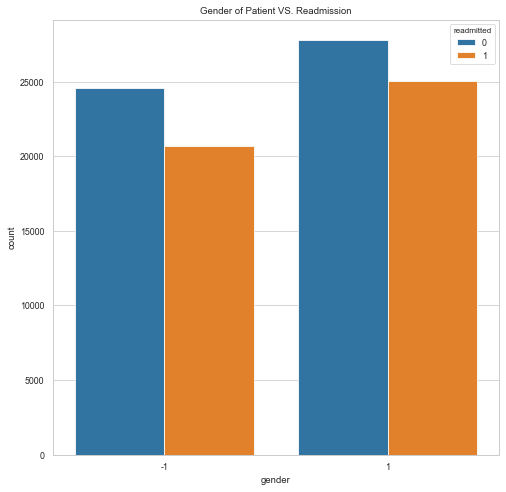

In [167]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## 標準化

In [100]:
from sklearn import preprocessing

In [169]:
y = df['readmitted']

In [170]:
df = df.drop('readmitted',axis=1)
X = preprocessing.scale(df)

In [172]:

X = df

## 切分訓練與測試資料集

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=2)
X_train.shape,X_test.shape

((68636, 62), (29416, 62))

In [178]:
X_train

race  gender  age  time_in_hospital  num_lab_procedures  \
37891     4      -1   65                12                  77   
19795     4       1   75                 2                  31   
37529     4       1   55                 4                  41   
5792      8       1   55                 2                  21   
83756     4      -1   75                 5                   9   
52891     4       1   85                 9                  43   
85226     8      -1   25                 2                   1   
91844     4       1   65                12                  47   
95543     4      -1   65                 6                  58   
89676     8       1   85                 7                  75   
859       4      -1   55                 3                  51   
23059     8      -1   55                 2                  54   
48171     4       1   75                 6                  73   
15892     4       1   75                 5                  24   
34630     4       1   65                 7                  46   
77943     4       1   85                13                  76   
57185     8      -1   45                 4                  69   
10034     4      -1   65                10                  24   
38345     4      -1   85                 4                  38   
15375     4       1   85                12                  78   
56049     8       1   65                11                  53   
9723      4      -1   65                 2                  45   
11536     4       1   65                 4                  64   
69556     4      -1   75                 2                  66   
53383     4       1   55                 3                  37   
7731      4      -1   65                 2                  35   
51074     4      -1   65                 2                   9   
89020     4      -1   85                 2                  11   
66816     4      -1   75                 2                  62   
10881     4      -1   75                 6                  41   
...     ...     ...  ...               ...                 ...   
56644     4      -1   25                 1                  27   
16639    16       1   65                 3                  42   
86909     4       1   85                 2                  18   
20026     4       1   55                14                  42   
15905     4      -1   75                 9                  27   
8170      4       1   45                 3                  27   
60967     4       1   75                 3                  30   
95084     8      -1   95                 4                  56   
21418     4       1   55                 4                  36   
51880     4       1   85                 6                  41   
85621     4       1   65                 3                  28   
41085     4      -1   45                 3                  71   
72085     8       1   55                 4                  51   
51931     4       1   75                11                  10   
32032     4       1   75                 2                  37   
11071     8       1   75                 1                  34   
70704     8      -1   55                 4                  10   
35542     4      -1   65                 4                  10   
43596     4      -1   65                 5                   1   
33202    16      -1   75                 5                  49   
53923     8       1   65                 5                  30   
44296     8      -1   45                 3                  17   
80233     4       1   65                 3                   1   
33868     4       1   55                 4                  39   
84435    16       1   65                 3                  55   
31020     8       1   75                 6                  49   
44567     4       1   35                 3                  14   
95817     4       1   75                 9                  53   
72174     4      -1   65                 8     

## 使用羅吉斯回歸來看準確率

In [179]:
# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(X_train, y_train)

# 預測測試集
y_pred = logreg.predict(X_test)

c:\users\cia_rookie\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [180]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.6202066902366059


In [181]:
y_pred = logreg.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict     0     1   All
Actual                   
0        3359  1519  4878
1        2747  1305  4052
All      6106  2824  8930

## 使用隨機森林預測

https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [60]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

## n_estimators : 決策樹的個數,一般訂為100 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [61]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67     17924
           1       0.51      0.61      0.55     11492

    accuracy                           0.62     29416
   macro avg       0.61      0.62      0.61     29416
weighted avg       0.63      0.62      0.62     29416



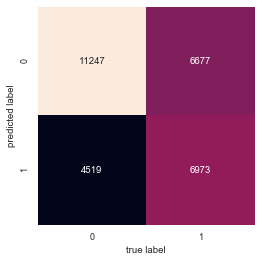

In [62]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [63]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.6193908077236878


## XGBOOST預測

In [182]:
from xgboost import XGBClassifier

The accuracy of eXtreme Gradient Boosting Classifier on testing set:
 0.6265637748164264


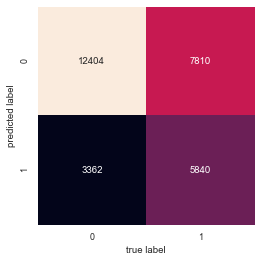

In [183]:
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:\n', xgbc.score(X_test, y_test))

### 以上為(未觀察資料的基本預測) 若是對資料熟悉 , 得知某些特殊關連的話

### 可以人工篩選出更為優秀的特徵 使預測率提升